# **Build encoder and decoder = Variational Autoencoder**

---



In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 32, 3, stride=2, padding=1),  # input shape: 3x64x64, output shape: 32x32x32
            nn.ReLU(True),
            nn.Conv2d(32, 64, 3, stride=2, padding=1),  # output shape: 64x16x16
            nn.ReLU(True),
            nn.Conv2d(64, 128, 3, stride=2, padding=1),  # output shape: 128x8x8
            nn.ReLU(True),
            nn.Conv2d(128, 256, 3, stride=2, padding=1),  # output shape: 256x4x4
            nn.ReLU(True),
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(256, 128, 3, stride=2, padding=1, output_padding=1),  # input shape: 256x4x4, output shape: 128x8x8
            nn.ReLU(True),
            nn.ConvTranspose2d(128, 64, 3, stride=2, padding=1, output_padding=1),  # output shape: 64x16x16
            nn.ReLU(True),
            nn.ConvTranspose2d(64, 32, 3, stride=2, padding=1, output_padding=1),  # output shape: 32x32x32
            nn.ReLU(True),
            nn.ConvTranspose2d(32, 3, 3, stride=2, padding=1, output_padding=1),  # output shape: 3x64x64
            nn.Tanh()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Load the CIFAR-10 dataset
transform = transforms.Compose([
    transforms.Resize((64, 64)),  # Resize images to 64x64
    transforms.ToTensor()
])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)

# Initialize the autoencoder
autoencoder = Autoencoder()

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, _ = data
        optimizer.zero_grad()
        outputs = autoencoder(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:    # Print every 100 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

print('Finished Training')
# Save the trained model
torch.save(autoencoder.state_dict(), 'autoencoder.pth')

# **Show the model architecture**

In [46]:
from PIL import Image
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import files
import matplotlib.pyplot as plt

# Load the pre-trained autoencoder
autoencoder = Autoencoder()
autoencoder.load_state_dict(torch.load('autoencoder.pth'))
autoencoder.eval()

Autoencoder(
  (encoder): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): ReLU(inplace=True)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (7): ReLU(inplace=True)
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(256, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): ConvTranspose2d(128, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): ConvTranspose2d(64, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(32, 3, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (

Saving smart.jpg to smart.jpg


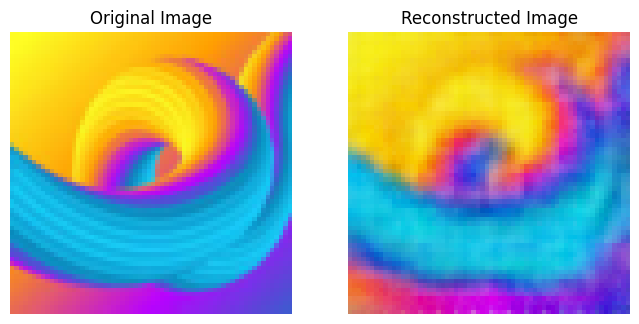

In [58]:
def preprocess_image(image_path):
    transform = transforms.Compose([
        transforms.Resize((64, 64)),
        transforms.ToTensor()
    ])
    image = Image.open(image_path)
    image = transform(image).unsqueeze(0)  # Add batch dimension
    return image

# Function to reconstruct the image
def reconstruct_image(image):
    with torch.no_grad():
        reconstructed_image = autoencoder(image)
    return reconstructed_image

# Load the pre-trained autoencoder
autoencoder = Autoencoder()
autoencoder.load_state_dict(torch.load('autoencoder.pth')) # Specify the model path.
autoencoder.eval()
uploaded = files.upload()

# Get the path of the uploaded image
image_path = next(iter(uploaded))

# Preprocess the uploaded image
image = preprocess_image(image_path)

# Reconstruct the image
reconstructed_image = reconstruct_image(image)

# Display the original and reconstructed images
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(image.squeeze().permute(1, 2, 0))
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image.squeeze().permute(1, 2, 0))
plt.title('Reconstructed Image')
plt.axis('off')
plt.show()


# **Image Semantic Communication Part**

torch.Size([1, 256, 4, 4])


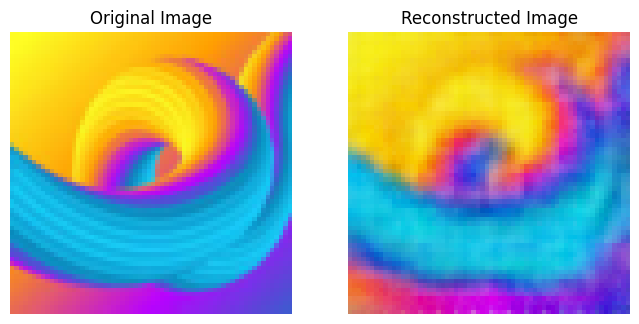

In [61]:
# Getting the latent space from the encoder
latent_space = autoencoder.encoder(image)
print(latent_space.shape)
latent_space

# After sending the latent space in the network, you can decode it to reconstruct the original image.
#
# Here what you do in the communication part, I don't know about it at the moment.
#
with torch.no_grad():
  reconstructed_image_vector = autoencoder.decoder(latent_space)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(image.squeeze().permute(1, 2, 0))
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image.squeeze().permute(1, 2, 0))
plt.title('Reconstructed Image')
plt.axis('off')
plt.show()




In [24]:
reconstructed_image.shape

torch.Size([1, 3, 32, 32])

# **Sample image reconstruction from the CIFAR-10 dataset**

torch.Size([32, 3, 64, 64])


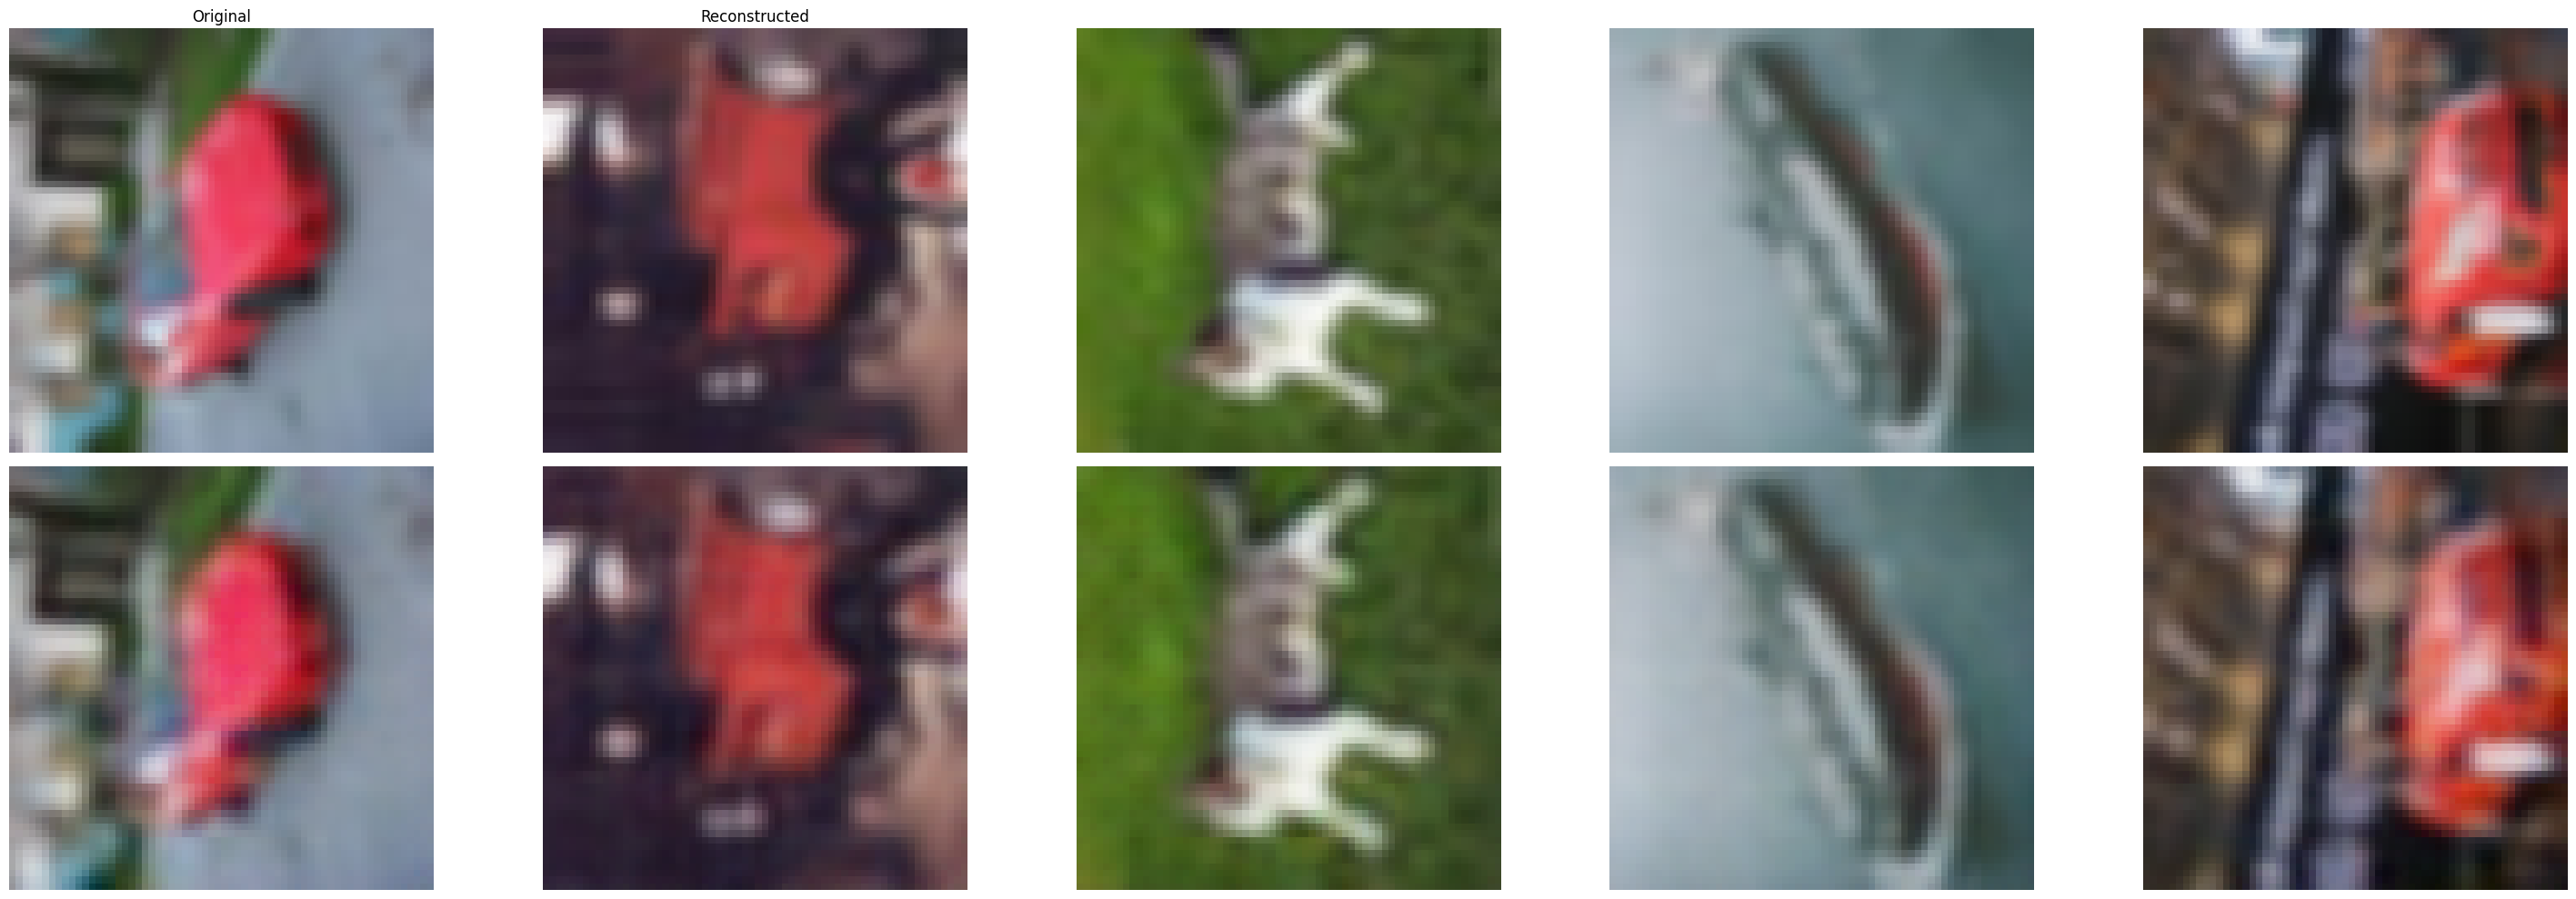

In [57]:
import matplotlib.pyplot as plt
# Load the trained model
autoencoder.load_state_dict(torch.load('autoencoder.pth'))
images, _ = next(iter(trainloader))

# Generate reconstructed images
reconstructed_images = autoencoder(images)
print(images.shape)

# Plot original images and reconstructed images
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(30, 10))

for images, row in zip([images, reconstructed_images.detach()], axes):
    for img, ax in zip(images, row):
        ax.imshow(torch.transpose(img, 0, 2).numpy())
        ax.axis('off')

titles = ['Original', 'Reconstructed']
for ax, title in zip(axes[0], titles):
    ax.set_title(title)

plt.tight_layout()
plt.show()

# **Upvote it :)** 👍